# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep="\t")
except:
    print('Не удалось открыть файл')

In [ ]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

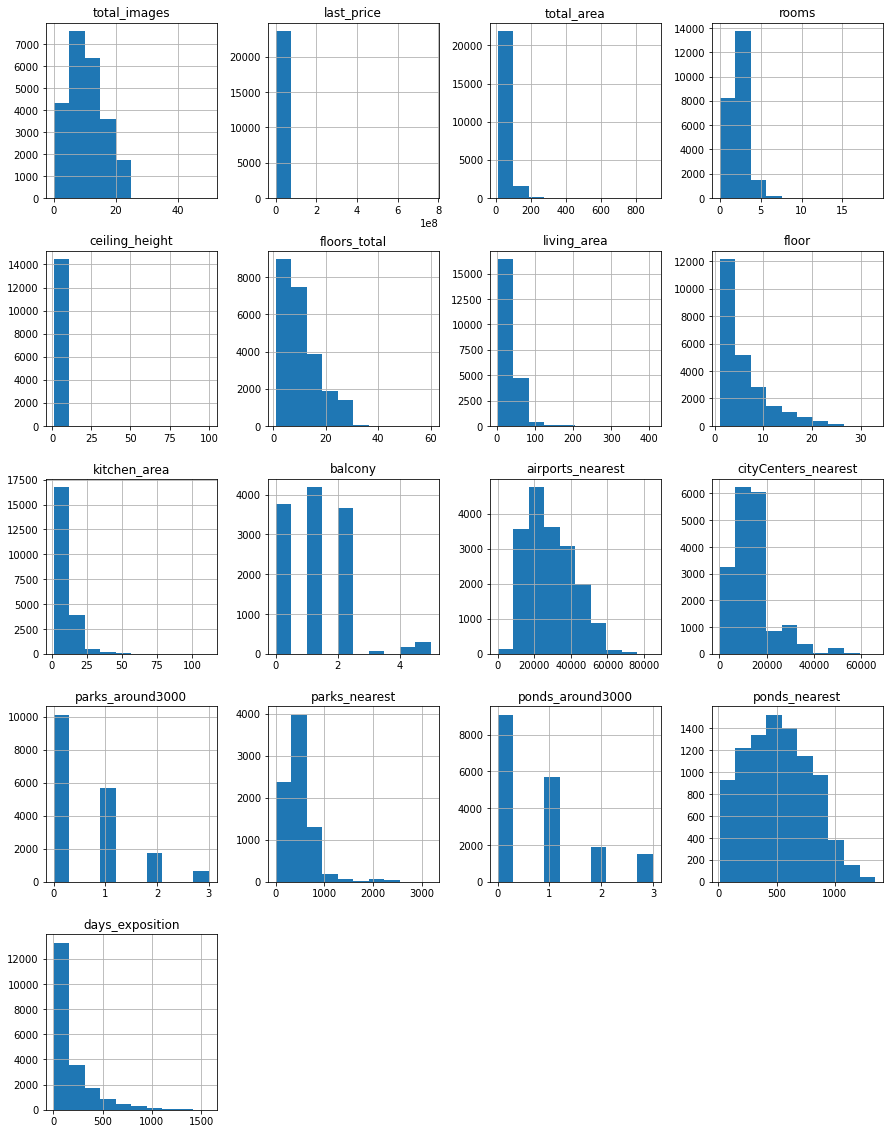

In [ ]:
data.hist(figsize=(15,20))

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

Подсчет пропущенных значений

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Заполнение пропусков и замена уникальных значений

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isna().sum())

0


In [ ]:
data.loc[(data['ceiling_height'] > 10),'ceiling_height'] = data['ceiling_height'] / 10

data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4),'ceiling_height'] = data['ceiling_height'].median()

data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 2.  ,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12,
       2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 3.82, 3.54, 3.53, 2.83,
       2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62,
       2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66,
       3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33,
       3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84, 3.23, 3.02, 3.21,
       3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99,
       3.49, 2.91, 3.88, 3.29, 2.25, 3.76, 3.69, 2.26, 2.89, 3.58, 2.49,
       3.48, 3.59])

Аномально маленькие значения для площади кухни заменим на мимнимально возможные по стандартам площади. Площади кухни, где значения больше 30 квадратных метров, поделим на 10.

In [ ]:
data['kitchen_area'] = data['kitchen_area'].abs()
data.loc[data['kitchen_area']>30,'kitchen_area'] = data['kitchen_area']/10
data.loc[((data['kitchen_area']<6)&(data['rooms'] == 1)&(data['studio']==False)), 'kitchen_area'] = 6 #минимальная площадь кухонь для однокомнатных квартир - 6 квадратных метров
data.loc[((data['kitchen_area']<6)&(data['rooms'] > 1)&(data['studio']==False)), 'kitchen_area'] = 8 #минимальная площадь кухонь для квартир с более, чем 1 комантой- 8 квадратных метров


In [ ]:
data.loc[data['living_area']<6] = 6
data['living_area'].sort_values(ascending=True).unique()

array([  6. ,   6.5,   8. , ..., 409. , 409.7,   nan])

Заполняем пропуски разностью всей площади и площади кухни, там, где это возможно. В остальных случаях заполняем медианой.

In [ ]:
data['living_area'] = data['living_area'].fillna(((data['total_area']-data['kitchen_area'])/data['total_area']).mean() * data['total_area'])
print(data['living_area'].isna().sum())

data['living_area'].sort_values(ascending=True).unique()


0


array([  6.        ,   6.5       ,   8.        , ..., 409.        ,
       409.7       , 512.71489217])

Заполяняем пропуски для площади кухни разностью всей площади и жилой площади.

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
print(data['kitchen_area'].isna().sum())

0


In [ ]:
data['balcony'] = data['balcony'].fillna(0)

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Заполняем пропуски у количества парков, прудов поблизости и времени, в течение которого висели объявления. Будем считать, что если стоит пропуск у прудов и парков в радиусе 3 км, то их там нет, поэтому заполним нулями. Пропуски во времени висения объявлений заполним медианой.

In [ ]:
print(data['parks_around3000'].isna().sum())
data['parks_around3000'] = data['parks_around3000'].fillna(0)
print(data['parks_around3000'].sort_values(ascending=False).unique())

5517
[6. 3. 2. 1. 0.]


In [ ]:
print(data['ponds_around3000'].isna().sum())
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data['ponds_around3000'].sort_values(ascending=False).unique())


5517
[6. 3. 2. 1. 0.]


In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
print(data['days_exposition'].isna().sum())

0


Разбираемся с дубликатами.     

In [ ]:
count=0
for i in range(len(data['locality_name'])):
    if 'ё' in str(data['locality_name'][i]):
        data['locality_name'][i] = data['locality_name'][i].replace('ё','е')
for i in range(len(data['locality_name'])):
    if 'городской поселок' in str(data['locality_name'][i]):
        data['locality_name'][i] = data['locality_name'][i].replace('городской поселок','поселок городского типа')
print(data['locality_name'].unique())


/tmp/ipykernel_342/2920154655.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'][i] = data['locality_name'][i].replace('ё','е')


['Санкт-Петербург' 'поселок Шушары' 'поселок городского типа Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кал

/tmp/ipykernel_342/2920154655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'][i] = data['locality_name'][i].replace('городской поселок','поселок городского типа')


Пропуски в расстояниях до центра, парков, прудов и аэропортов, а также время размещения публикации точно заполнить не удастся, поэтому оставим их.




Поменяем тип времени.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data["first_day_exposition"],format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-info">
<b>Вывод</b>:    
В ходе предобработки данных были выявлены и исправлены аномальные значения площади кухни, были заполнены пропуски в данных там, где это возможно и исправлены дубликаты. </div>

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
data['square_meter_price'] = data['last_price'] / (data['living_area'] + data['kitchen_area'])

In [ ]:
data['week_day'] = data['first_day_exposition'].dt.weekday


In [ ]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month


In [ ]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year


In [ ]:
def floor_category(floor_number):
    if floor_number['floor'] == 1:
        return 'Первый'
    elif floor_number['floor'] == floor_number['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

data['floors_category'] = data.apply(floor_category,axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day,month_of_exposition,year_of_exposition,floors_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,95.0,171052.631579,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,113175.675676,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,121971.830986,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,129.194402,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,250000.000000,1,6,2018,Другой


In [ ]:
data['distance_to_centre'] = data['cityCenters_nearest'] / 1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day,month_of_exposition,year_of_exposition,floors_category,distance_to_centre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,95.0,171052.631579,3,3,2019,Другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,113175.675676,1,12,2018,Первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,121971.830986,3,8,2015,Другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,129.194402,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,250000.000000,1,6,2018,Другой,8.098


### Проведите исследовательский анализ данных

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day,month_of_exposition,year_of_exposition,distance_to_centre
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,8082.000000,23699.000000,9113.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18181.000000
mean,9.857167,6.537882e+06,60.335207,2.071733,2.694012,10.671579,35.822965,5.891430,10.579931,0.592472,...,0.470442,490.373299,0.592219,517.620762,169.329845,1.317618e+05,2.569391,6.399046,2017.355120,14.187834
std,5.681921,1.088082e+07,35.658772,1.079936,0.211141,6.596134,23.985181,4.883388,5.534441,0.963072,...,0.753646,342.482551,0.888007,277.899092,206.545889,8.288646e+04,1.788749,3.492062,1.283991,8.611549
min,0.000000,6.000000e+00,6.000000,0.000000,2.000000,1.000000,6.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,6.000000,1.000000,5.000000e-01,0.000000,1.000000,1970.000000,0.006000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.800000,0.000000,...,0.000000,287.000000,0.000000,293.000000,45.000000,9.577151e+04,1.000000,3.000000,2017.000000,9.234000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,31.000000,4.000000,9.000000,0.000000,...,0.000000,454.000000,0.000000,502.000000,95.000000,1.223629e+05,3.000000,6.000000,2017.000000,13.098000
75%,14.000000,6.799500e+06,69.800000,3.000000,2.700000,16.000000,43.200000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,729.000000,199.000000,1.517241e+05,4.000000,10.000000,2018.000000,16.293000
max,50.000000,7.630000e+08,900.000000,19.000000,6.000000,60.000000,512.714892,33.000000,230.000000,6.000000,...,6.000000,3190.000000,6.000000,1344.000000,1580.000000,4.034008e+06,6.000000,12.000000,2019.000000,65.968000


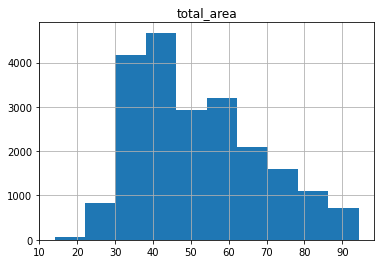

In [ ]:
total_area_filtered = data[(data['total_area']<(69+(69-52)*1.5))&(data['total_area']>(39-(69-52)*1.5))]['total_area']

total_area_filtered_df = pd.DataFrame(data=total_area_filtered)

total_area_filtered_df.hist()

data['total_area_filtered_df'] = total_area_filtered_df


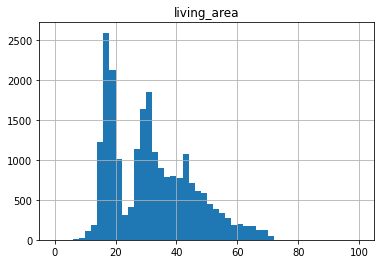

In [ ]:
living_area_filtered = data[(data['living_area']<(39+(39-18)*1.5))]['living_area']

living_area_filtered_df = pd.DataFrame(data=living_area_filtered)

living_area_filtered_df.hist(bins=50,range=(0,100))

data['living_area_filtered_df'] = living_area_filtered_df


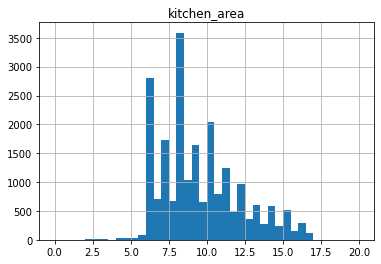

In [ ]:
kitchen_area_filtered = data[(data['kitchen_area']<(11+(11-7)*1.5))&((data['kitchen_area']>(7-(11-7)*1.5)))]['kitchen_area']

kitchen_area_filtered_df = pd.DataFrame(data=kitchen_area_filtered)

kitchen_area_filtered_df.hist(bins=40,range=(0,20))

data['kitchen_area_filtered_df'] = kitchen_area_filtered_df

Чаще всего покупают квартиры обще площадью примерно 50 м^2, жилой площадью чуть больше 30 м^2 и площадью кухни чуть меньше 25 м^2.

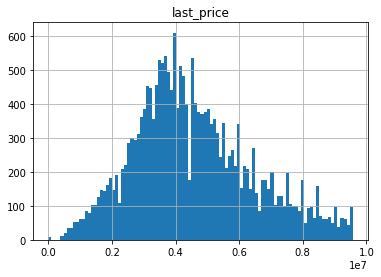

In [ ]:
last_price_filtered = data[(data['last_price']<(5800000+(5800000-3280000)*1.5))&((data['last_price']>(3280000-(5800000-3280000)*1.5)))]['last_price']

last_price_filtered_df = pd.DataFrame(data=last_price_filtered)

last_price_filtered_df.hist(bins=100)

data['last_price_filtered_df'] = last_price_filtered_df

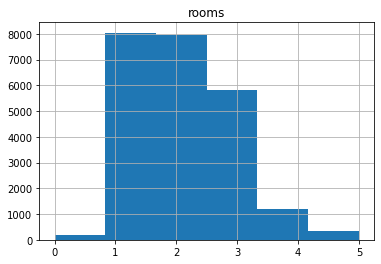

In [ ]:
rooms_filtered = data[(data['rooms']<6)]['rooms']

rooms_filtered_df = pd.DataFrame(data=rooms_filtered)

rooms_filtered_df.hist(bins=6)

data['rooms_filtered_df']=rooms_filtered_df

Квартир ценой примерно 4-5 миллиона рублей продано больше всего, а именно чуть менее 5000 штук.

Около 8000 проданых квартир были однокомнатные и двукомнатные. Чуть хуже продаются трехкомнатные квартиры, около 6000. Квартир с большим количеством комнат продано сильно меньше.

count    23699.000000
mean         2.694012
std          0.211141
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


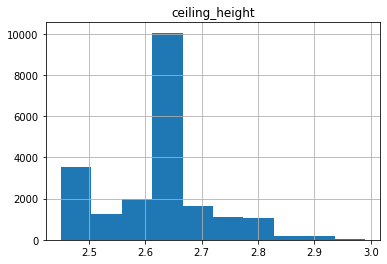

In [ ]:
print(data['ceiling_height'].describe())

ceiling_height_filtered = data[(data['ceiling_height']<3)&(data['ceiling_height']>2.4)]['ceiling_height']

ceiling_height_filtered_df = pd.DataFrame(data=ceiling_height_filtered)

ceiling_height_filtered_df.hist()

data['ceiling_height_filtered_df'] = ceiling_height_filtered_df

Больше всего продано квартир с высотой потолка около 2.7 метра, больше 12000. Более, чем в два раза меньше проданых квартир с высотой потолка примерно 2.5 метра, таких продано 5000 штук.

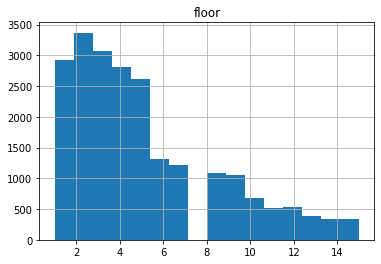

In [ ]:
floor_filtered = data[(data['floor']<16)]['floor']

floor_filtered_df = pd.DataFrame(data=floor_filtered)

floor_filtered_df.hist(bins=16)

data['floor_filtered_df'] = floor_filtered_df

<AxesSubplot:>

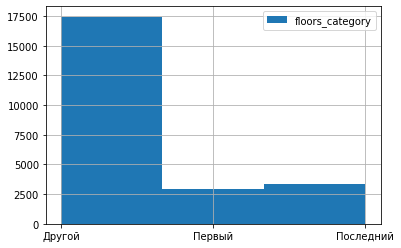

In [ ]:
data['floors_category'].hist(bins=3,legend='floors_category')


Около 3000 проданых квартир были на втором, третьем, четвертом этажах, примерно столько же квартир было продано на первом этаже. Начиная с пятого этажа, количество проданых квартир сильно падает.

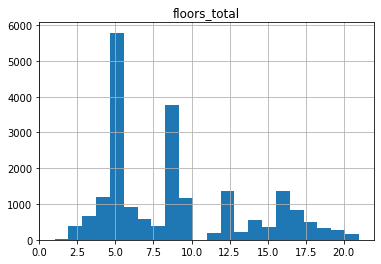

In [ ]:
floors_total_filtered = data[data['floors_total']<22]['floors_total']
floors_total_filtered_df = pd.DataFrame(data=floors_total_filtered)

floors_total_filtered_df.hist(bins=22)

data['floors_total_filtered_df'] = floors_total_filtered_df

Выделяются пятиэтажные дома (больше 5000 квартир продано в таких домах), девятиэтажные (примерно 4000).

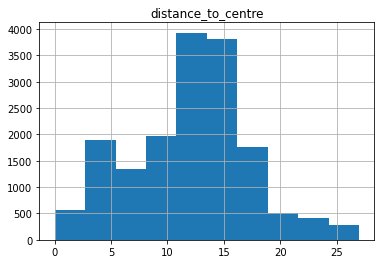

In [ ]:
distance_to_centre_filtered = data[data['distance_to_centre']<27]['distance_to_centre']
distance_to_centre_filtered_df = pd.DataFrame(data=distance_to_centre_filtered)

distance_to_centre_filtered_df.hist()

data['distance_to_centre_filtered_df'] = distance_to_centre_filtered_df

Больше всего квартир было продано в примерно 10-15 километрах от центра города.

count    18158.000000
mean     28784.540643
std      12641.015192
min          0.000000
25%      18576.000000
50%      26723.500000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


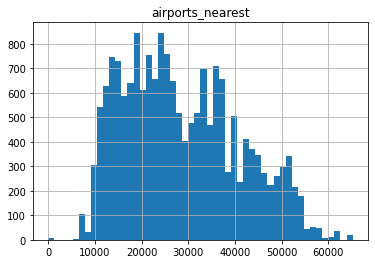

In [ ]:
print(data['airports_nearest'].describe())

airports_nearest_filtered = data[data['airports_nearest']<65249]['airports_nearest']

airports_nearest_filtered_df = pd.DataFrame(data=airports_nearest_filtered)

airports_nearest_filtered_df.hist(bins=50)

data['airports_nearest_filtered_df'] = airports_nearest_filtered_df

Основная часть проданых квартир примерно в 20 километрах от ближайших аэропортов.

<AxesSubplot:>

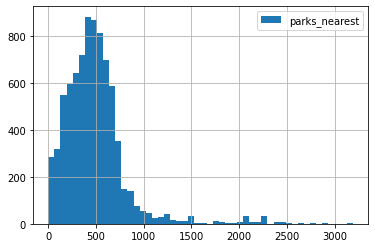

In [ ]:
data['parks_nearest'].hist(bins=50,legend='parks_nearest')

Основная часть проданых квартир примерно в 500 метрах от ближайших парков.

<AxesSubplot:>

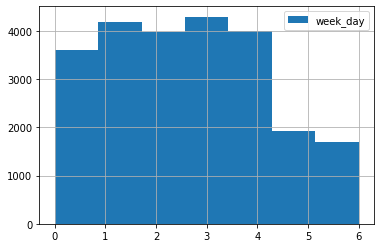

In [ ]:
data['week_day'].hist(bins=7,legend='week_day')

Основная часть продаж приходится на рабочую неделю, меньше всего продаж в выходные.

<AxesSubplot:>

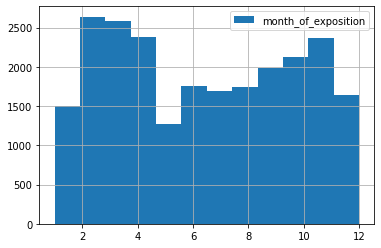

In [ ]:
data['month_of_exposition'].hist(bins=12,legend='month_of_exposition')

Основная часть продаж приходится на начало года, летом продажи резко падают и постепенно поднимаются к Новому Году.

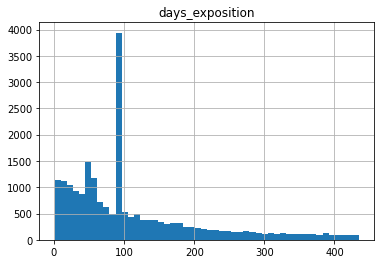

In [ ]:
days_exposition_filtered = data[data['days_exposition']<436]['days_exposition']

days_exposition_filtered_df = pd.DataFrame(data=days_exposition_filtered)

days_exposition_filtered_df.hist(bins=50)

data['days_exposition_filtered_df'] = days_exposition_filtered_df

In [ ]:
data['days_exposition'].median()

95.0

In [ ]:
data['days_exposition'].mean()

169.3298451411452

Обычно продажа занимает примерно 50 дней. Объявлений, которые висели больше 200 дней, более чем пять раз меньше, чем тех, которые сняли через 50 дней. Поэтому можно считать продажи, совершившиеся больше чем через 200 дней после размещения объявления, долгими. Продажи, совершившиеся менее чем за 50 дней после размещения объявления, можно считать быстрыми.

Строим графики медиан цен от различных значений параметров (общей площади, жилой площади и т.д.)

0.6311903637153695


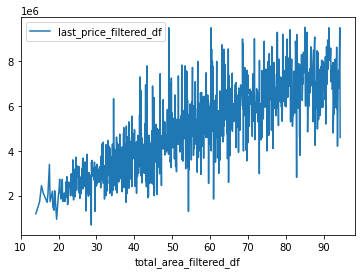

In [ ]:
data.pivot_table(index='total_area_filtered_df',values='last_price_filtered_df',aggfunc='median').plot()

print(data['total_area_filtered_df'].corr(data['last_price_filtered_df']))

0.6115653993601576


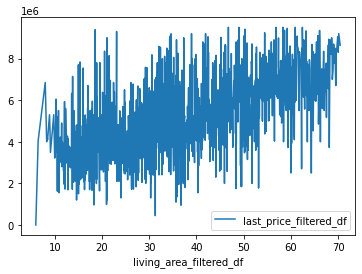

In [ ]:
data.pivot_table(index='living_area_filtered_df',values='last_price_filtered_df',aggfunc='median').plot()



print(data.pivot_table(index='living_area_filtered_df',values='last_price_filtered_df',aggfunc='median').join(living_area_filtered_df)['living_area'].corr(data['last_price_filtered_df']))

0.4153426227419872


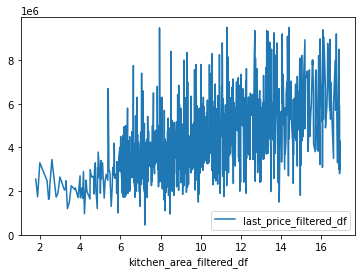

In [ ]:
data.pivot_table(index='kitchen_area_filtered_df',values='last_price_filtered_df',aggfunc='median').plot()

#если проданых квартир с кухней площадью в райное 150 м^2 всего 1, томожно считать пик выбросом и не обращать на него внимание

print(data['kitchen_area_filtered_df'].corr(data['last_price_filtered_df']))

<AxesSubplot:xlabel='rooms_filtered_df'>

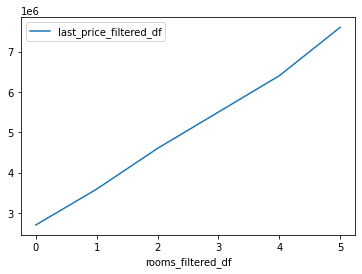

In [ ]:
#Если проданых квартир с 12 комнатами всего 1, томожно считать пик на 12 выбросом и не обращать на него внимание

data.pivot_table(index='rooms_filtered_df',values='last_price_filtered_df',aggfunc='median').plot()



<AxesSubplot:xlabel='floors_category'>

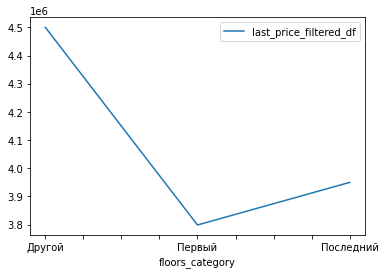

In [ ]:
data.pivot_table(index='floors_category',values='last_price_filtered_df',aggfunc='median').plot()

<AxesSubplot:xlabel='first_day_exposition', ylabel='last_price_filtered_df'>

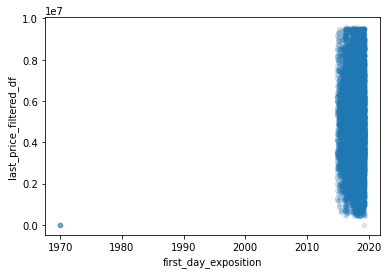

In [ ]:
data.plot(x='first_day_exposition',y='last_price_filtered_df',kind='scatter',alpha=0.15)

Чем больше общая площадь квартиры, тем больше она стоит. То же можно сказать и про жилую площадь, про площадь кухни, однако начиная с площади кухни в 200 м^2, явной зависимости между ценой и площадью кухни нет.

Чем больше комнат в квартире, тем дороже она стоит.

Цена также зависит от этажа. Чем выше квартира, тем она дороже, однако, самые дорогие квартиры находятся между первым и последним этажами.

Явной зависимости цены от даты снятия объявления нет.

In [ ]:
print(data.groupby('locality_name')['living_area'].count().sort_values(ascending=False).head(10))

cities = ['Санкт-Петербург','поселок Мурино','поселок Шушары','Всеволожск','Пушкин','Колпино','поселок Парголово','Гатчина','деревня Кудрово','Выборг']

dt = data.groupby('locality_name')[['living_area','last_price']].sum()['last_price']/data.groupby('locality_name')[['living_area','last_price']].sum()['living_area']

average_cost_per_city = []

for city in cities:
    average_cost_per_city.append([dt.loc[city],city])

print(sorted(average_cost_per_city))


locality_name
Санкт-Петербург      15716
поселок Мурино         555
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: living_area, dtype: int64
[[89759.72287247643, 'Выборг'], [115122.71054667888, 'Гатчина'], [118537.0791254846, 'Всеволожск'], [123101.6536252402, 'Колпино'], [135413.05198887672, 'поселок Шушары'], [150336.80311200977, 'поселок Мурино'], [164597.80087750344, 'деревня Кудрово'], [166613.3301232047, 'поселок Парголово'], [181243.96812426852, 'Пушкин'], [209676.61562595752, 'Санкт-Петербург']]


Самая дешевая площадь в Выборге, а самая дорогая в Санкт-Петербурге среди 10 населенных пунктов с наибольшим количеством объявлений.

<AxesSubplot:xlabel='distance_to_centre'>

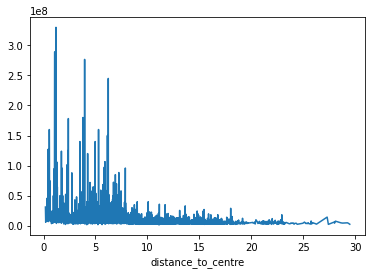

In [ ]:
data.head()
number_per_distance = data.loc[data['locality_name']=='Санкт-Петербург'].groupby('distance_to_centre')['last_price'].count()
total_price = data.loc[data['locality_name']=='Санкт-Петербург'].groupby('distance_to_centre')['last_price'].sum()
average_price = total_price / number_per_distance
average_price.plot()

Чем ближе к центру квартира, тем выше её цена.

### Общий вывод

Была выявлена зависимость между ценой и количеством комнат, площадью, расстоянием до центра для квартир в Санкт-Петербурге и этажом. Чем меньше площадь, чем меньше комнат, дальше центр, тем дешевле квартира.

Также, чаще всего покупаются квартиры на нижних этажах, в 10-15 километрах от центра, в домах с, как правило, 5 и 9 этажами недалеко от парков.

Чаще всего продаются квартиры зимой, ранней весной в течение рабочей недели.



    
Было проведено исследование по выявлению зависимости цены квартиры от различных факторов. Для этого была изучена таблица с
данными о проданных квартирах. Перед исследованием были поставлены следующие гипотезы:
1) Цена квартиры зависит от жилой площади
    
2) Цена квартиры зависит от общей площади

3) Цена квартиры зависит от площади кухни

4) Цена квартиры зависит от количества комнат

5) Цена квартиры зависит от этажа

6) Цена квартиры зависит от даты размещения

Первая гипотеза подтвердилась, коэффициент корреляции между жилой площадью и ценой равна 0,61. То же самое можно сказать про общую площадь, для неё коэффициент корреляции 0,63.
Третья гипотеза частично подтвердилась, зависимость есть, но слабая: коэффициент корреляции равен 0,43.
    
Исходя из графиков, есть явная зависимость между количеством комнат в квартире и этажем. Самые дешевые квартиры находятся на первом этаже. Средняя цена для квартир на последнем этаже чуть выше. И самые дорогие находятся между первым и последним.
Студии и квартиры с одной комнатой стоят в районе 3 - 3,5 миллионов рублей, а квартиры с пятью комнатами - больше семи миллионов. Таким образом, четвертая и пятая гипотезы подтверждаются.
    
Цена от даты размещения не зависит.


    
Также, в ходе исследования была найдена десятка мест, в которых больше всего продавались квартиры. В Санкт-Петербурге больше всего продаж - около 16 тысяч, а в Выборге меньше всего - около 237. При этом в Выборге самые дешевые квартиры со средней ценой в примерно 90 тыс. рублей за квадратный метр, и самые дорогие в Санкт-Петербурге - примерно 210 тыс. рублей.
    
